<a href="https://colab.research.google.com/github/Akbarbfn/prediksi_anemia/blob/main/prediksi_anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
#Save filepath
path = "/content/drive/MyDrive/anemiaa.csv"
#Read the data and store
data_anemia = pd.read_csv(path)
#Print a sumarry data
data_anemia.describe()

,id,kode_provinsi,kode_kabupaten_kota,tahun,jumlah
count,48.000000,48.0,48.000000,48.000000,48.000000
mean,3397.500000,1.0,754.500000,2017.500000,1755.583333
std,1038.993089,0.0,2.315535,1.725898,3317.637020
min,1889.000000,1.0,751.000000,2015.000000,0.000000
25%,2494.750000,1.0,752.750000,2016.000000,0.000000
50%,3397.500000,1.0,754.500000,2017.500000,618.000000
75%,4300.250000,1.0,756.250000,2019.000000,1522.500000
max,4906.000000,1.0,758.000000,2020.000000,18499.000000


In [ ]:
features = ['kode_kabupaten_kota', 'tahun']
x = data_anemia[features]
y = data_anemia['jumlah']
x.shape, y.shape

((48, 2), (48,))

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=54)
test_y.shape

(12,)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse
model = KNN_Reg(n_neighbors = 5)

model.fit(train_x, train_y)
variable1 = model.score(test_x, test_y)

test_predict = model.predict(test_x)

score = mse(test_predict, test_y)
print('MSE : ', score, '\n', 'Accuracy : ', variable1)


MSE :  16130948.939999996 
 Accuracy :  0.3351906870571322


In [ ]:
def Elbow(K):
  test_mse =[]
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x,train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp,test_y)
    test_mse.append(tmp)

  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

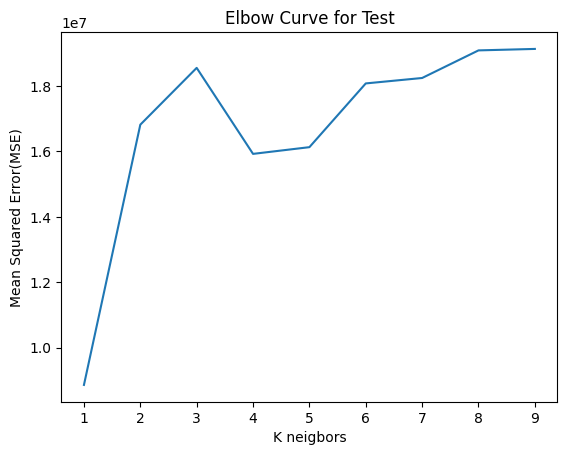

In [ ]:
K = range(1,10)
test = Elbow(K)

plt.plot(K,test)
plt.xlabel('K neigbors')
plt.ylabel('Mean Squared Error(MSE)')
plt.title('Elbow Curve for Test')



In [ ]:
new_model = KNN_Reg(n_neighbors=1)

new_model.fit(train_x, train_y)
variable2 = new_model.score(test_x,test_y)

print('Accuracy of new model(%): ',variable2*100, '\n', 'Accuracy of old model (%): ',variable1*100, '\n Improvment (%):', (variable2-variable1)*100)

Accuracy of new model(%):  63.47755555803699 
 Accuracy of old model (%):  33.51906870571322 
 Improvment (%): 29.958486852323773


In [ ]:
data_anemia = np.array([[2020,2025]])
prediction_lama = model.predict(data_anemia)
prediction_baru = new_model.predict(data_anemia)

print ('Hasil Prediksi Jumlah Anemia dengan Model lama : ', prediction_lama, '\n',
       'Hasil Prediksi Jumlah Anemia dengan Model Baru : ', prediction_baru)

Hasil Prediksi Jumlah Anemia dengan Model lama :  [1005.8] 
 Hasil Prediksi Jumlah Anemia dengan Model Baru :  [1254.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
